### Dependencies:

In [1]:
import yaml
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException

In [33]:
edge:object = webdriver.Edge(executable_path="./utils/msedgedriver.exe")

### Functions:

In [19]:
def resources(name:str) -> dict[str:str]:
    """Read xpath.yml file that contains xpath's to scrape"""

    with open("xpath.yml", "r") as f:
        content:dict[str:str] = yaml.safe_load(f)
        return content[name]

In [20]:
def close_prompt(driver:object) -> None:
    """Close ad window"""

    button:str = "//a[@class='btn btn-subscription-light']"
    driver.find_element(by=By.XPATH, value=button).click()

In [21]:
def choose_category(category:str, driver:object) -> None:
    """Choose ad category"""

    driver.find_element(by=By.XPATH, value=category).click()

In [22]:
def click_element(element:object, path:str) -> None:
    """Click element on the current document"""

    button = element.find_element(by=By.XPATH, value=path)
    button.click()

In [23]:
def extract_description(element:object, path:str) -> str:
    """Extract ad description on the current document"""

    description:str = element.find_element(by=By.XPATH, value=path)
    return description

In [65]:
def extract_feature(element:object, path:str) -> list[str]:
    """Extract some feature from list document based on xpath used."""

    try:
        feature:str = element.find_elements(by=By.XPATH, value=path)
        feature = [data_point.text for data_point in feature]
        return feature
    except Exception:
        prices.append("Web wasn't able to scrape the feature")



In [34]:
def persistence(dataframe:pd.DataFrame) -> None:
    """Generate .csv file from data scraped"""

    file_name = datetime.today().strftime("%B-%d")
    dataframe.to_csv(f"persistence/{file_name}.csv", index=False)

In [35]:
def parse_prices(dataframe: pd.DataFrame, column:str) -> None:
    """
    Cast string prices to int prices.
    Works with $#,### or $#,###\n* pattern
    """

    price_rg:str = r"^\$(?P<prices>\d+,\d+)?"

    dataframe[column] = df[column] \
        .str.extract(price_rg) \
        .applymap(lambda price: int(price.replace(",","")))


## Extraction 🧲

### Sedan:

Variables pool.

In [64]:
descriptions:list[str] = []
prices:list[int] = []
models:list[str] = []
years:list[int] = []
kilometers:list[int] = []
engines:list[str] = []

# seconds
DELAY:int = 3

In [57]:
sedan = resources("cars_sedan")

Get web & close initial prompt.

In [36]:
edge.get(sedan["url"])
close_prompt(edge)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//a[@class='btn btn-subscription-light']"}
  (Session info: MicrosoftEdge=110.0.1587.41)


In [ ]:
elements = edge.find_elements(by=By.XPATH, value=sedan["ad"])

Extract descriptions.

In [ ]:
elements[0].click()
try:
    for element in range(len(elements)):
        dynamic_delay = WebDriverWait(edge, DELAY).until(EC.presence_of_element_located((By.XPATH, sedan["description"])))
        temp = extract_description(edge, sedan["description"])
        descriptions.append(temp.text)
        click_element(edge, sedan["next"])
except TimeoutException as TE:
    descriptions.append("Web wasn't able to scrape descriptions")
except NoSuchElementException as NSE:
    click_element(edge, sedan["exit"])

Extract prices & models.

In [ ]:
prices = extract_feature(edge, sedan["price"])
models = extract_feature(edge, sedan["model"])
models.remove("Blue Book Encuentra24")

Extract car year, engine & kilometers.

In [66]:
years = extract_feature(edge, sedan["year"])
engines = extract_feature(edge, sedan["engine"])
kilometers = extract_feature(edge, sedan["kilometers"])

## Procesing ⚙

In [4]:
# working with persistence data
df = pd.read_csv("./persistence/February-10.csv")

Remove invasive ad from list document.

### Price column:

Chance price dtype from str -> int

In [11]:
parse_prices(df, "price")

<AxesSubplot: >

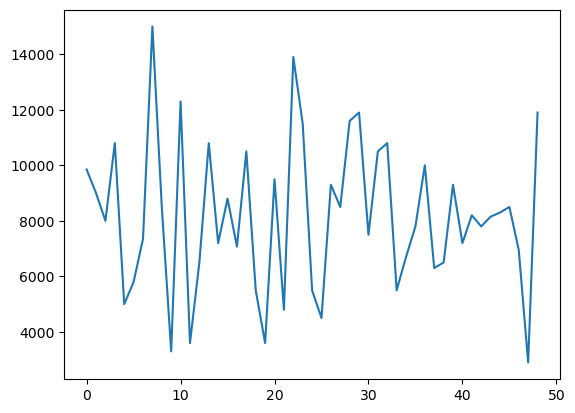

In [37]:
df["price"].plot()